In [2]:
# I/O and Computation
import numpy as np
import pandas as pd

# Viz
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Read
df = pd.read_csv("pollution_us_2000_2016.csv")
# Time Formatting
df = df.drop(['Unnamed: 0'], axis=1)
df['Date Local'] = pd.to_datetime(df['Date Local'],format='%Y-%m-%d') # date parse
df['Year'] = df['Date Local'].dt.year # year
def custom_describe(df):
  
    unique_count = []
    for x in df.columns:
        mode = df[x].mode().iloc[0]
        unique_count.append([x,
                             len(df[x].unique()),
                             df[x].isnull().sum(),
                             mode,
                             df[x][df[x]==mode].count(),
                             df[x].dtypes])
    return pd.DataFrame(unique_count, columns=["Column","Unique","Missing","Mode","Mode Occurence","dtype"]).set_index("Column").T
describe = custom_describe(df)


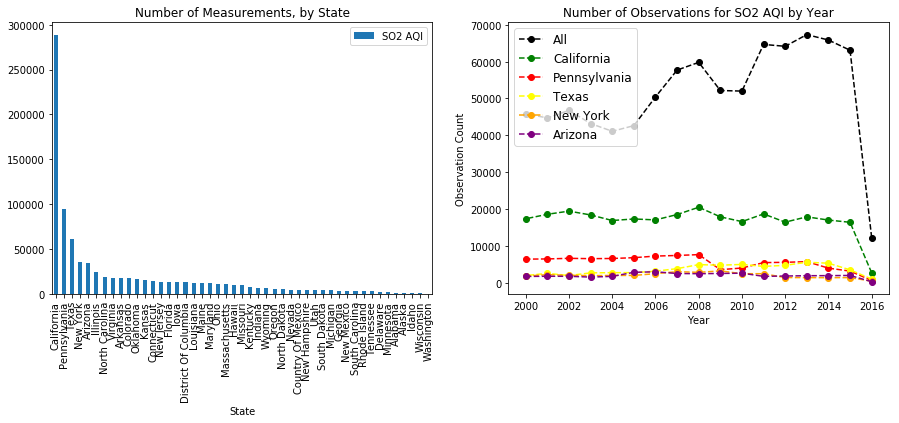

In [3]:
f , ax = plt.subplots(1,2, figsize=[15,5])
temp = df[['SO2 AQI','State']].groupby(["State"]).count()\
.sort_values(by='SO2 AQI',ascending=False)
df[['SO2 AQI','State']].groupby(["State"]).count()\
.sort_values(by='SO2 AQI',ascending=False).plot.bar(ax=ax[0])
ax[0].set_title("Number of Measurements, by State")
temp.to_csv("Graph1.csv")
var = "SO2 AQI"

# Df
temp_df = df[[var,'Year','State']].groupby(["Year"]).count().reset_index().sort_values(by='Year',ascending=False)
topstate = df[[var,'State']].groupby(["State"]).count().sort_values(by='SO2 AQI',ascending=False).index [:5]
state_col = ["green","red","yellow","orange","purple"]
temp_df.to_csv("Graph2.csv")
# Plot
ax[1].set_title('Number of Observations for {} by Year'.format(var))
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Observation Count')
plt.plot(temp_df.Year,temp_df["SO2 AQI"],marker='o', linestyle='--', color='black', label='Square')
for (i,col) in zip(topstate, state_col):
    state_df= df[df.State==i][[var,'Year','State']].groupby(["Year"])\
    .count().reset_index().sort_values(by='Year',ascending=False)
    ax[1].plot(state_df.Year,state_df[var],marker='o', linestyle='--', color=col, label='Square')
ax[1].legend(topstate.insert(0, "All") , loc=2,fontsize='large')
plt.show()


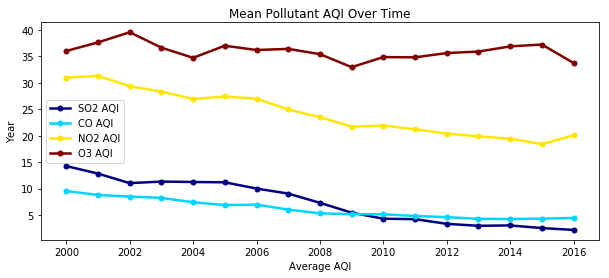

In [4]:
# Plot the aggregate decrease of all pollutants
f, ax = plt.subplots(figsize=[10,4])
t = df.groupby(['Year']).agg({'SO2 AQI': 'mean',
                          'CO AQI': 'mean',
                          'NO2 AQI': 'mean',
                          'O3 AQI': 'mean'})
t.to_csv("Graph3.csv")
df.groupby(['Year']).agg({'SO2 AQI': 'mean',
                          'CO AQI': 'mean',
                          'NO2 AQI': 'mean',
                          'O3 AQI': 'mean'})\
.plot(lw=2,colormap='jet',marker='.',markersize=10, ax =ax,linewidth=2.5)
ax.set_title('Mean Pollutant AQI Over Time')
ax.set(xlabel="Average AQI", ylabel="Year")
plt.show()

Trend of all pollutants, except for Ozone, is downward, signifying a general betterment of air quality in the United States.

In [11]:
df.head()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Year
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN,2000
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0,2000
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN,2000
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0,2000
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN,2000


***
# Analysis on New York Data:



13     2000
34     2001
55     2002
77     2003
98     2004
117    2005
141    2006
169    2007
198    2008
227    2009
258    2010
293    2011
328    2012
365    2013
406    2014
447    2015
482    2016
Name: Year, dtype: int64

In [74]:
f['NO2 Mean'][f['State'] == 'New York']


13     23.167191
34     25.031920
55     23.964215
77     22.882433
98     20.890264
117    21.335947
141    19.239112
169    18.541224
198    16.704223
227    12.976844
258    12.980506
293    13.088027
328    18.094766
365    17.919659
406    16.920592
447    17.165994
482    17.847473
Name: NO2 Mean, dtype: float64

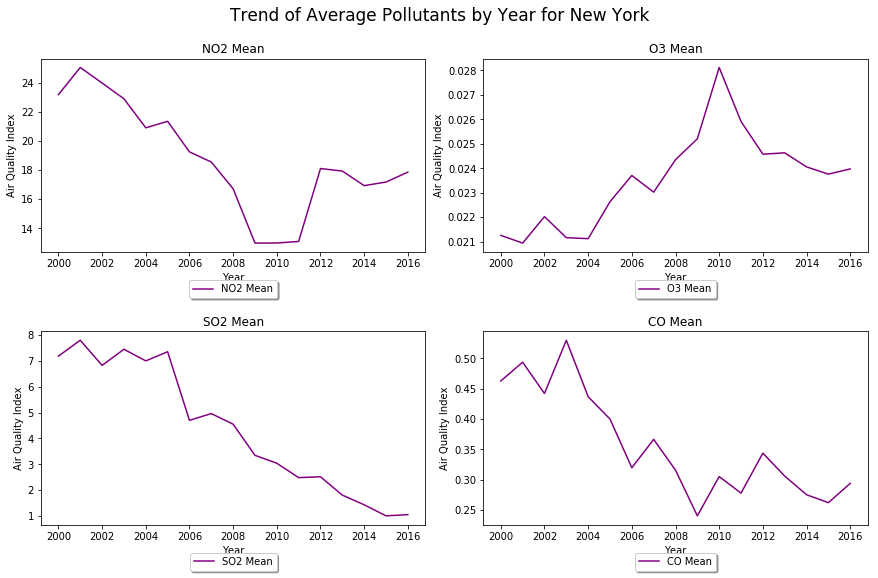

In [85]:
# Plot Mega-Helper
f = df.groupby(["Year",'State']).mean().reset_index()
f.to_csv("Graph4.csv")


def years_site_city_plot(state, rol_window):
    plt.figure(figsize=(12,8))    
    for var,plot in [('NO2 Mean',221), ('O3 Mean',222),('SO2 Mean',223),("CO Mean",224)]:
        plt.subplot(plot)
        plot1 = f
        plot1 = plot1[plot1['State'] == state]
        #plot1[var] = plot1[var].rolling(window = rol_window).mean()
        x = plot1['Year']
        y = plot1[var]
        plt.plot(x,y, color='purple', label=var)
        plt.title(var)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=4)
        plt.title(var)
        plt.xlabel("Year")
        plt.ylabel("Air Quality Index")
    plt.tight_layout(pad=0, w_pad=0.5, h_pad=2.5)
    plt.subplots_adjust(top=0.89)
    plt.suptitle("Trend of Average Pollutants by {} for {}".format("Year",state),fontsize=17)
    plt.show()
    

years_site_city_plot(state="New York", rol_window=5)

In [6]:
a = 0.80
def pol_bar_plot(time, rol_window):
    plt.figure(figsize=(12,8))
    width = .90 
    plot1 = cal.groupby([time]).mean()
    plot1 = plot1.rolling(window = rol_window).mean()
    X= list(range(len(set(plot1.index))))
    labels = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    
    for index, (var,plot) in enumerate([('NO2 AQI',221), ('O3 AQI',222),('SO2 AQI',223),("CO AQI",224)]):
        plt.subplot(plot)
        X= list(range(len(set(plot1.index))))
        plt.bar(left=[p + width for p in X], height=plot1[var],
                width=width,label=var,alpha=a)
        plt.title(var)
        # plt.xlabel(time)
        plt.ylabel("Air Quality Index")
        plt.xticks([p + width for p in X], labels)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
                   fancybox=True, shadow=True, ncol=4)
    plt.tight_layout(pad=0, w_pad=0.5, h_pad=2.5)
    plt.subplots_adjust(top=0.89)
    plt.suptitle("Trend of Average Pollutant by {}".format(time),fontsize=17)
    plt.show()
    
   
#Plot Data
pol_bar_plot(time="Weekday", rol_window=1)

NameError: name 'cal' is not defined

<Figure size 864x576 with 0 Axes>

# 3. Understanding Pollution Distribution and Interactions:
<a id="p5"></a>

_Univariate and Bivariate Analysis_

In [7]:
sns.heatmap(Pollutants.corr(), annot=True, fmt=".2f", cmap="viridis",cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Plot")
plt.show()

NameError: name 'Pollutants' is not defined

**Interpretation:** <br>
CO AQI and NO2 AQI stand out with the highest positiive correlation out of the bunch.

***
**2-D Distribution:** <br>

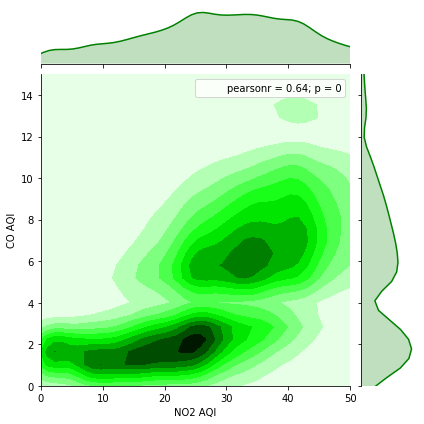

In [17]:
# Examine Strongest Correlation
sns.jointplot(x=cal["NO2 AQI"], y=cal["CO AQI"], kind='kde', xlim=(0,50),ylim=(0,15),color='g')
plt.show()

**Interpretation:** <br>
As Carbon Dioxide increases, so does Nitrogen Oxide. The shade/cloud is a two dimensional distribution.


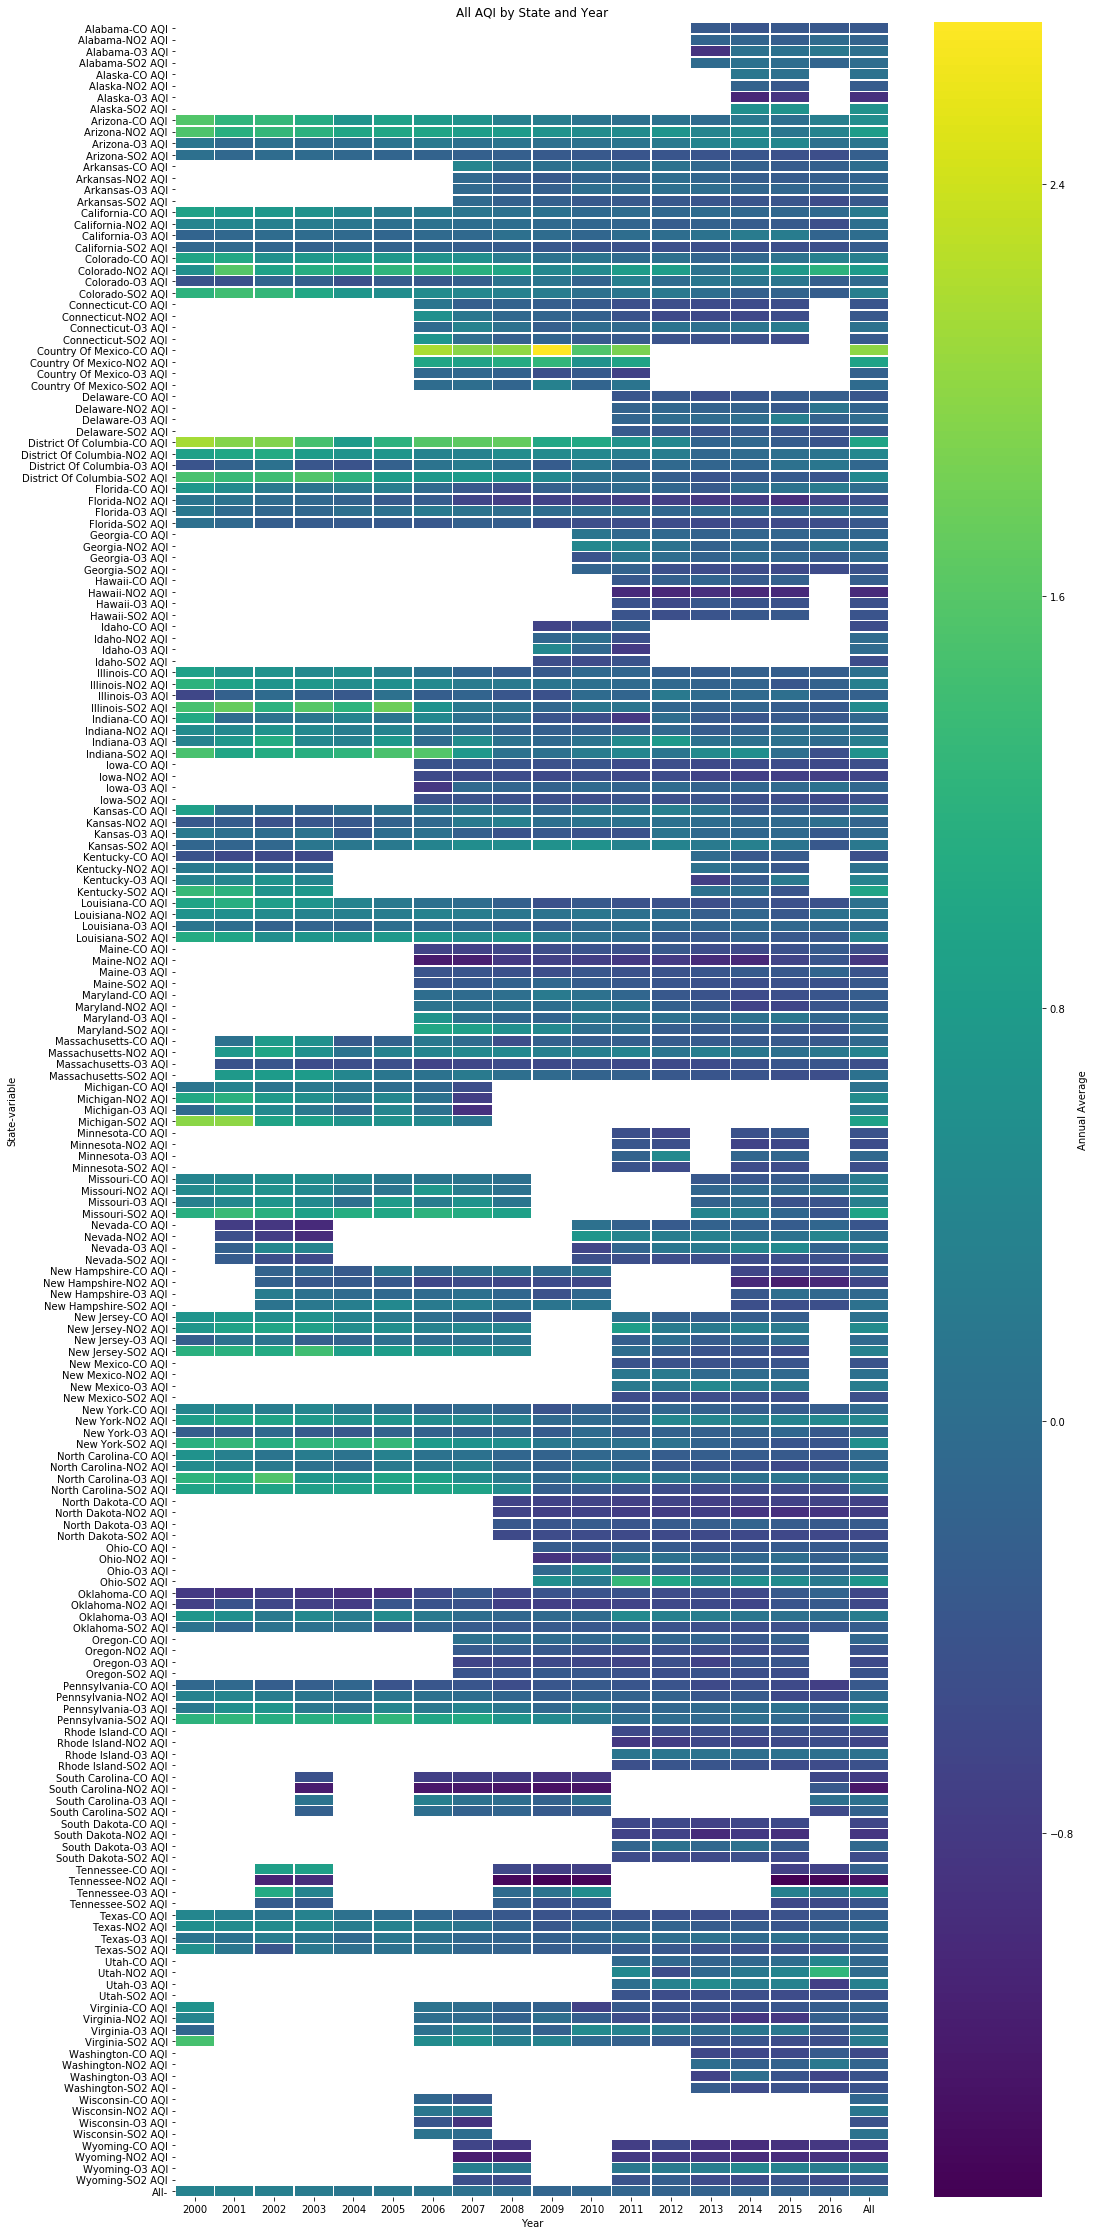

In [18]:
polldata= ['NO2 AQI','O3 AQI','SO2 AQI',"CO AQI"]
stack_df = df[['State','Year','NO2 AQI','O3 AQI','SO2 AQI',"CO AQI"]]

for col in polldata:
    stack_df[col] =(stack_df[col] - stack_df[col].mean())/stack_df[col].std(ddof=0)
    
stack_df = stack_df.melt(["State", "Year"])#.stack()
stack_df.head()

# Create Heatmap Pivot with State as Row, Year as Col, So2 as Value
polldata= ['NO2 AQI','O3 AQI','SO2 AQI',"CO AQI"]

f, ax = plt.subplots(figsize=(16,40))
ax.set_title('All AQI by State and Year')
sns.heatmap(stack_df.pivot_table(values="value", index=["State", "variable"], columns=["Year"], aggfunc='mean',margins=True),
                annot=False, linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'}, cmap="viridis")
plt.show()